# Universidad Nacional de Colombia
## Técnicas de Inteligencia Artificial
## Taller Redes Neuronales
#### Ana Sofía Aponte Barriga, Jose Alejandro Peñaranda Chía, Daniel Esteban Prieto Jiménez, David Felipe Silva Chacón

Se trabajará con una cantidad N=200 de vectores de entrenamiento.
Inicialmente creamos el dataset. Para esto, empleamos la función make_blobs de sklearn, que nos proporcionará data linealmente separable generada aleatoriamente, así como su clasificación.

In [37]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

vectores = []
N = 100
features = 2
x, y = make_blobs(n_samples=N, n_features=features, centers=2, cluster_std=2, random_state=2)
xext = np.zeros([N, features+1])
for i in range(N):
    xext[i] = np.concatenate(([1], x[i]))


A continuación, definimos la cantidad de iteraciones. También generamos los pesos aleatoriamente, empleando la función rand de numpy.

In [38]:
k = 1000
w = np.random.rand(features+1)
print("Pesos iniciales", w)

Pesos iniciales [0.79047434 0.69660165 0.24745963]


Ahora, creamos el ciclo mayor dentro del cuál se calculará la suma, el valor de salida y el error para cada vector de entrenamiento. También se actualizan los parámetros W según el resultado y calculado.
En este ciclo, además, se evaluará en cada iteración si se cumple la condición de parada (error igual a cero para todos los vectores) o si se alcanzaron ya todas las iteraciones.

In [39]:
message = "Mensaje"
yResult = []
lrate = 0.2
for iteration in range(k):
    errorCheck = False
    yTemp = []
    for i in range(N):
        net = np.dot(xext[i], w)
        if (net >= 0):
            yTemp.append(1)
        else:
            yTemp.append(0)
        if (iteration == k-1):
            print(y[i], yTemp[i])
        error = y[i] - yTemp[i]
        if(error != 0):
            errorCheck = True
            w = w + error * xext[i] * lrate
        yResult = np.asarray(yTemp)
    if (not errorCheck):
        print("Todos los errores son cero")
        print("Última iteración: ", iteration)
        break
    if (iteration == k-1):
        print("Límite de iteraciones alcanzado")
        break

print("Pesos resultantes: ", w)

0 0
0 0
0 1
1 1
1 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
0 0
1 1
0 0
1 1
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 0
1 1
1 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
0 0
1 1
1 0
0 0
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
0 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
0 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
Límite de iteraciones alcanzado
Pesos resultantes:  [21.79047434  1.19938521  4.38932515]


Como se puede ver en las gráficas a continuación, empleando 100 vectores y con 1000 iteraciones, se programó con éxito el perceptrón, dando como resultado una clasificación con muy pocos errores.

Text(0.5, 1.0, 'Resultado obtenido')

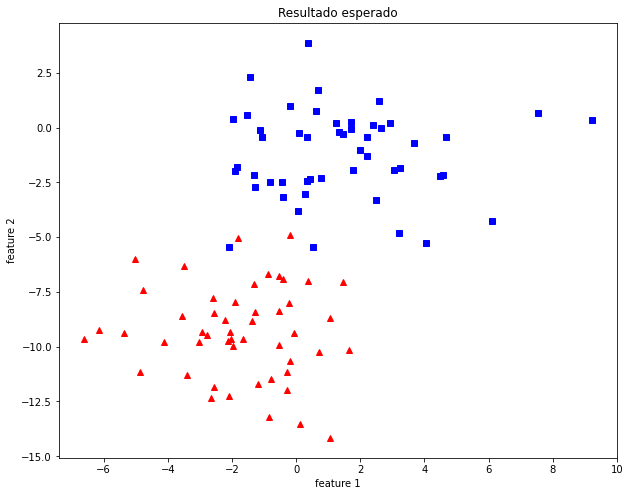

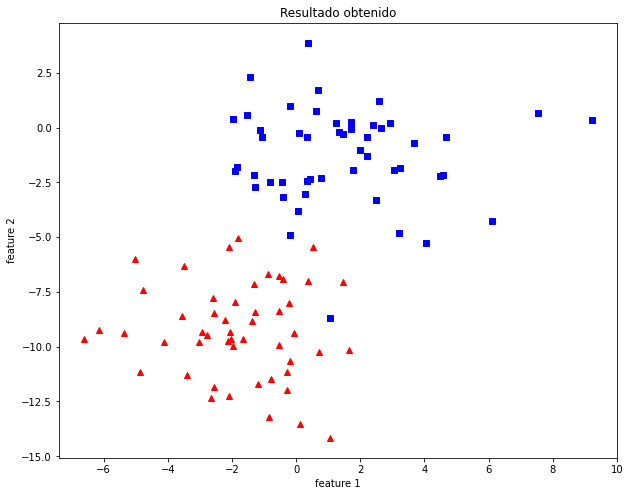

In [42]:
fig1 = plt.figure(figsize=(10,8))
plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], 'r^')
plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Resultado esperado')

fig2 = plt.figure(figsize=(10,8))
plt.plot(x[:, 0][yResult == 0], x[:, 1][yResult == 0], 'r^')
plt.plot(x[:, 0][yResult == 1], x[:, 1][yResult == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Resultado obtenido')